In [1]:
#Observations:
    #1: Capomulin seemed to successfuly decrease the tumor growth over time.
    #2: Capomulin was the only drug to reduce tumor volume over time (from ~45 mm3 to ~36 mm3 over 45 days).
    #3: Capomulin had ~85% survival rate vs other 3 drugs in question, which all had under 50% survival rate. 

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
read_mouse = pd.read_csv("data/mouse_drug_data.csv")
read_clinic = pd.read_csv("data/clinicaltrial_data.csv")

In [3]:
# Combine the data into a single dataset
combined_df = pd.merge(read_clinic, read_mouse, on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor = combined_df.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_df = pd.DataFrame(mean_tumor).reset_index()

# Preview DataFrame
tumor_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_error = combined_df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
std_df = pd.DataFrame(std_error).reset_index()

# Preview DataFrame
std_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor = mean_tumor.reset_index()
mean_tumor_pivot = mean_tumor.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
mean_tumor_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [7]:
# Minor Data Munging to Re-Format the Data Frames
std_df = std_df.reset_index()
std_df_pivot = std_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
std_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


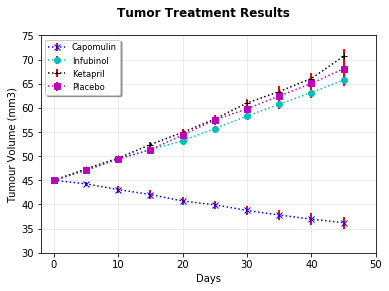

In [26]:
# Generate the Plot (with Error Bars) -- added subplots for opportunity to show other graphs together
fig, ax = plt.subplots()
fig.suptitle("Tumor Treatment Results",fontsize=12, fontweight="bold")

ax.errorbar(mean_tumor_pivot.index, mean_tumor_pivot["Capomulin"], yerr=std_df_pivot["Capomulin"], fmt='x', ecolor='r', elinewidth=2, linestyle=':', color='b')
ax.errorbar(mean_tumor_pivot.index, mean_tumor_pivot["Infubinol"], yerr=std_df_pivot["Infubinol"], fmt='o', ecolor='r', elinewidth=2, linestyle=':', color='c')
ax.errorbar(mean_tumor_pivot.index, mean_tumor_pivot["Ketapril"], yerr=std_df_pivot["Ketapril"], fmt='+', ecolor='r', elinewidth=2, linestyle=':', color='k')
ax.errorbar(mean_tumor_pivot.index, mean_tumor_pivot["Placebo"], yerr=std_df_pivot["Placebo"], fmt='s', ecolor='r', elinewidth=2, linestyle=':', color='m')

ax.set_xlim(-2, 50)
ax.set_ylim(30, 75)

ax.set_ylabel("Tumour Volume (mm3)")
ax.set_xlabel("Days")
ax.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc='best', fontsize="small", fancybox=True, shadow=True)
ax.grid(color='0.85', linestyle='-', linewidth=0.5)

# Save the Figure
plt.savefig("../TumorTreatmentResults.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metast = combined_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
metastic_df = pd.DataFrame(mean_metast).reset_index()

# Preview DataFrame
metastic_df

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
std_error_metast = combined_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
# Convert to DataFrame
std_df_metast = pd.DataFrame(std_error_metast).reset_index()
# Preview DataFrame
std_df_metast

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [11]:
# Minor Data Munging to Re-Format the Data Frames
metastic_df = metastic_df.reset_index()
metastic_mean_df_pivot = metastic_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
metastic_mean_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [12]:
# Minor Data Munging to Re-Format the Data Frames
std_df_metast = std_df_metast.reset_index()
metastic_sem_df_pivot = std_df_metast.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
metastic_sem_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


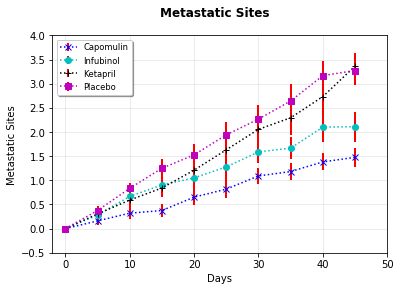

In [13]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
fig.suptitle("Metastatic Sites",fontsize=12, fontweight="bold")

ax.errorbar(metastic_mean_df_pivot.index, metastic_mean_df_pivot["Capomulin"], yerr=metastic_sem_df_pivot["Capomulin"], fmt='x', ecolor='r', elinewidth=2, linestyle=':', color='b')
ax.errorbar(metastic_mean_df_pivot.index, metastic_mean_df_pivot["Infubinol"], yerr=metastic_sem_df_pivot["Infubinol"], fmt='o', ecolor='r', elinewidth=2, linestyle=':', color='c')
ax.errorbar(metastic_mean_df_pivot.index, metastic_mean_df_pivot["Ketapril"], yerr=metastic_sem_df_pivot["Ketapril"], fmt='+', ecolor='r', elinewidth=2, linestyle=':', color='k')
ax.errorbar(metastic_mean_df_pivot.index, metastic_mean_df_pivot["Placebo"], yerr=metastic_sem_df_pivot["Placebo"], fmt='s', ecolor='r', elinewidth=2, linestyle=':', color='m')

ax.set_xlim(-2, 50)
ax.set_ylim(-0.5, 4)

ax.set_ylabel("Metastatic Sites")
ax.set_xlabel("Days")
ax.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc='best', fontsize="small", fancybox=True, shadow=True)
ax.grid(color='0.85', linestyle='-', linewidth=0.5)


# Save the Figure
plt.savefig("MetastaticSitesResults.png")

# Show the Figure
plt.show()

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survive_count = combined_df.groupby(["Drug", "Timepoint"]).count()["Metastatic Sites"]

# Convert to DataFrame
survive_count = pd.DataFrame({"Mouse Count": survive_count}).reset_index()

# Preview DataFrame
survive_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames
survive_count_pivot = survive_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]
# Preview the Data Frame
survive_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


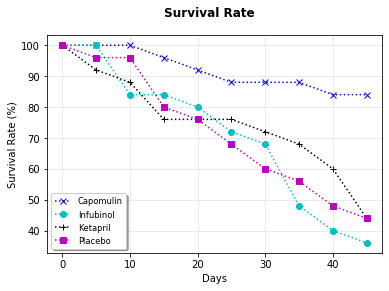

In [16]:
# Generate the Plot (Accounting for percentages)
fig, ax = plt.subplots()
fig.suptitle("Survival Rate",fontsize=12, fontweight="bold")

ax.errorbar(survive_count_pivot.index, (survive_count_pivot["Capomulin"]/25)*100, fmt='x', linestyle=':', color='b')
ax.errorbar(survive_count_pivot.index, (survive_count_pivot["Infubinol"]/25)*100, fmt='o', linestyle=':', color='c')
ax.errorbar(survive_count_pivot.index, (survive_count_pivot["Ketapril"]/25)*100, fmt='+', linestyle=':', color='k')
ax.errorbar(survive_count_pivot.index, (survive_count_pivot["Placebo"]/25)*100, fmt='s', linestyle=':', color='m')

#ax.set_xlim(-2, 50)
#ax.set_ylim(-0.5, 4)

ax.set_ylabel("Survival Rate (%)")
ax.set_xlabel("Days")
ax.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc='best', fontsize="small", fancybox=True, shadow=True)
ax.grid(color='0.85', linestyle='-', linewidth=0.5)

# Save the Figure
plt.savefig("SurvivalRate.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug
#df['column_name'].iloc[0] --> first element 
mean_tumor_pivot.iloc[0]

Drug
Capomulin    45.0
Ceftamin     45.0
Infubinol    45.0
Ketapril     45.0
Naftisol     45.0
Placebo      45.0
Propriva     45.0
Ramicane     45.0
Stelasyn     45.0
Zoniferol    45.0
Name: 0, dtype: float64

In [18]:
#df['column_name'].iloc[-1] --> last element 
mean_tumor_pivot.iloc[-1]

Drug
Capomulin    36.236114
Ceftamin     64.132421
Infubinol    65.755562
Ketapril     70.662958
Naftisol     69.265506
Placebo      68.084082
Propriva     66.258529
Ramicane     34.955595
Stelasyn     68.438310
Zoniferol    65.960888
Name: 45, dtype: float64

In [19]:
#(new number - original number)/ original number *100
mean_tumor_percent_change = ((mean_tumor_pivot.iloc[-1]-mean_tumor_pivot.iloc[0])/mean_tumor_pivot.iloc[0])*100

In [20]:
# Display the data to confirm
mean_tumor_percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

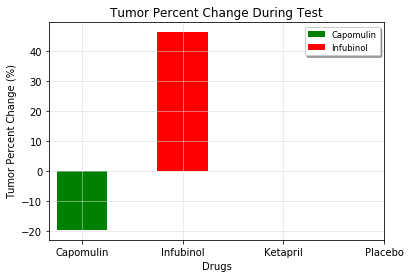

In [21]:
# Store all Relevant Percent Changes into a Tuple
percent_change = (mean_tumor_percent_change["Capomulin"],mean_tumor_percent_change["Infubinol"],mean_tumor_percent_change["Ketapril"],mean_tumor_percent_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
index = ([0,1,2,3])
passed = ax.bar(index[0], percent_change[0], width=0.5, color='green')
failed = ax.bar(index[1], percent_change[1], width=0.5, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_title('Tumor Percent Change During Test')
ax.set_ylabel("Tumor Percent Change (%)")
ax.set_xlabel("Drugs")
ax.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc='best', fontsize="small", fancybox=True, shadow=True)
ax.grid(color='0.85', linestyle='-', linewidth=0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_xticks(index)

# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure
fig.savefig("TumorPercentChange.png")

# Show the Figure
fig.show()